In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

#from keras.datasets import boston_housing
from sklearn.datasets import load_boston

In [2]:

boston = load_boston()
dfFeature = pd.DataFrame(boston.data, columns=boston.feature_names)
dfFeature

dfPrice = pd.DataFrame(boston.target)
dfPrice.columns =['Price']

df = pd.concat([dfFeature,dfPrice], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


pd.DataFrame(boston_housing.load_data())

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

len(x_train), len(x_test)

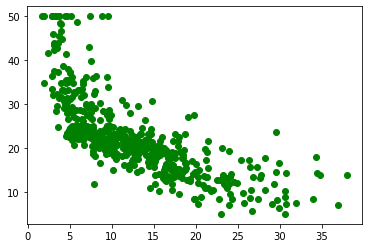

In [24]:

plt.plot(df['LSTAT'], df['Price'], 'o', color='green')

In [25]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

In [50]:
from sklearn.datasets import make_regression

model = sm.OLS( df['Price'], df['LSTAT'])
result0 = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                        0.00
Time:                        13:52:24   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

df.loc[:, df.columns!='Price']

In [51]:
model = sm.OLS(df['Price'], df.loc[:, df.columns!='Price'])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                        0.00
Time:                        13:52:26   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

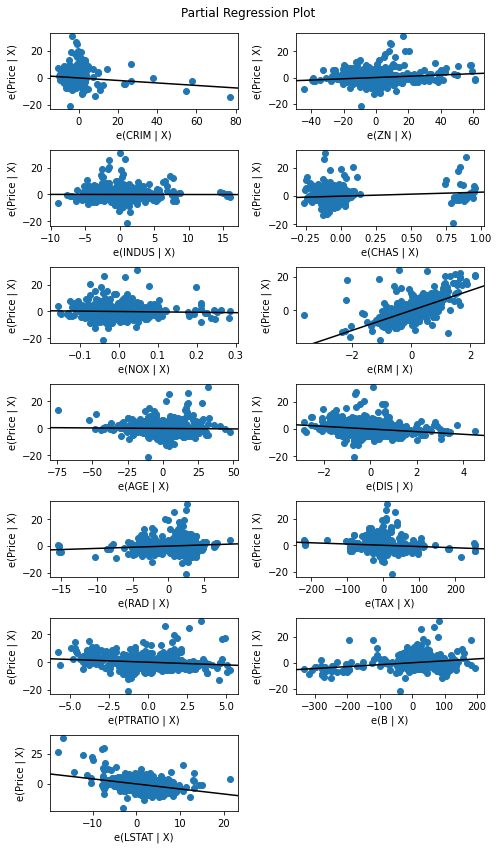

In [57]:
fig = plt.figure(figsize=(7,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

from statsmodels.graphics.regressionplots import abline_plot

ax = plt.subplot()
plt.scatter( df['LSTAT'], df['Price'])#df['Price'], df.loc[:, df.columns!='Price'])
sm.graphics.abline_plot(model_results=result0, ax=ax)

idx = hat > 0.05
plt.scatter(x4[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("ols regression and leverage")
plt.show()

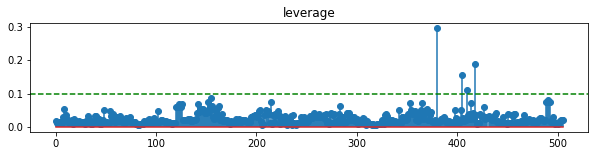

In [36]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat, use_line_collection=True)
plt.axhline(0.1, c="g", ls="--")
plt.title("leverage")
plt.show()

In [37]:
hat.sum()

13.000000000000002

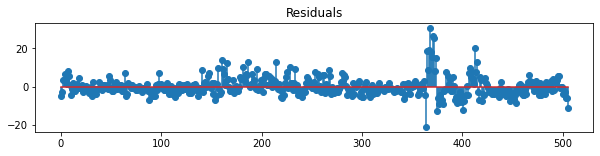

In [38]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid , use_line_collection=True)
plt.title("Residuals")
plt.show()


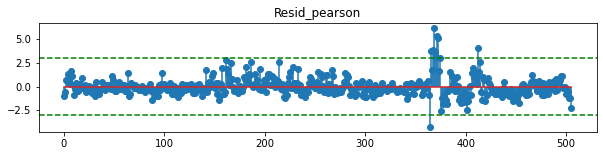

In [39]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson, use_line_collection=True)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Resid_pearson")
plt.show()

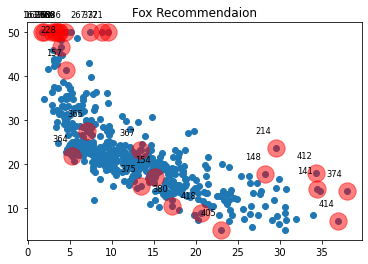

In [41]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(df['LSTAT'], df['Price'])
plt.scatter(x[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(x[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Fox Recommendaion")
plt.show()

In [19]:
dfX0 = dfFeature  #df.iloc[:, 0:13]
dfX = sm.add_constant(dfX0)
dfy = dfPrice

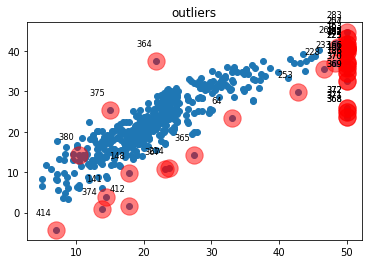

In [20]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

# remove data where price = 50 
idx = np.hstack([idx, np.where(boston.target == 50)[0]])

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.Price[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.Price[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("outliers")
plt.show()